In [2]:
from bs4 import BeautifulSoup
from selenium import webdriver

import time as t

# - 지니 웹 사이트에서 top 200 데이터를 뽑아보자

이번년 초에 강의를 진행하였을 때 (제가 뷰티풀수프밖에 몰랐던 시절에)<br>
어떤 학생이 지니 웹 사이트를 크롤링 해보고 싶다고 말했었는데

지니도 멜론과 마찬가지로 뜬금없이 사이트 URL로 가서 (전의 추적정보나 방문 페이지 정보 없이)<br>
HTML 데이터를 달라고 하면 바로 거절해버립니다

뭐 행여나 추적 정보를 입력해서 접근한다고 한들, 아예 HTML 자체가 나오지 않을 가능성도 높습니다<br>
따라서 이번 시간에도 편리하게 셀레니움을 이용해서 접근해보겠습니다

***

필요 라이브러리는 다음 3가지입니다 (앞으로도 계속 비슷할거에요)
 - 뷰티풀수프
 - 셀레니움
 - 타임 모듈 (셀레니움에서 로드를 기다리기 위함)

In [3]:
base_url = "https://www.genie.co.kr/chart/top200"

전에 어떤 유튜브 강의에서 제일 처음부터 url 주소를 따로 객체로 저장하는 방식이<br>
매우 인상적이고 편리해보였습니다 (실제로 해봐도 짱 편함)

따라서 base_url로 일단 주소를 저장하고 시작하겠습니다

In [ ]:
driver = webdriver.Chrome(
    executable_path="webdriver/chromedriver.exe"
)
driver.get(base_url)

셀레니움은 많은 유튜브 동영상을 보시면 아시겠지만, 가상으로 웹 페이지를 생성해서 접근하는 패키지입니다<br>
뭐 애초에 웹 페이지를 가상으로 테스트하기 위한 패키지이니까요 허허

그럼 여기서 가상으로 웹 페이지를 생성하는 방법은?<br>
크롬을 사용하고 가상으로 크롬 페이지를 생성하기 위해서 크롬 드라이버가 필요합니다

***

크롬 드라이버 다운로드 경로는 다음과 같습니다<br>
https://chromedriver.chromium.org/downloads

덤으로 크롬 설치도 권유드립니다<br>
https://www.google.com/intl/ko/chrome/

***

크롬 설치도 끝났고 크롬 드라이버도 무사히 받으셨다면<br>
현재 여러분께서 작업하고 계신 소스 파일이 있는 폴더에<br>
새로 webdriver라는 폴더를 생성해주세요

그리고 그 webdriver 폴더 안에 webdriver.exe 파일을 넣어준다음<br>
get 함수를 이용해서 우선 웹 페이지를 가상으로 실행해봅시다

***

예시) 나는 현재 아나콘다 네비게이터를 이용해서 쥬피터 노트북으로 소스 코드를 작성하고 있다<br>

1. C:\Users로 이동해서 여러분의 사용자 계정 폴더로 이동
2. 그 폴더 내에 소스 코드 파일이 있는지 확인 (보통 아나콘다 네비게이터 내 쥬피터 노트북은 여기에 주로 소스 코드를 저장합니다)
3. 만약 존재한다면 webdriver 폴더 생성 후 webdriver 안에 webdriver.exe 파일을 넣기

***

# 오류가 뜨면서 실행이 안되요!
가끔 크롬 드라이버를 잘 넣고 하는데 오류 메세지가 나오시는 분들이 계실 겁니다

그 중에서 가장 오류가 많이 발생하는 부분은 바로 현재 여러분께서 사용하고 계신 크롬 버전과 크롬 드라이버의 호환 문제인데요<br>
우선은 현재 깔려있는 크롬의 버전이 84 / 85 / 86인지 확인해봅시다

저는 현재 2020년 9월 10일에 설치하였는데 85버전이라고 뜨네요<br>
확인 방법은 오른쪽 상단 설정 - Chrome 정보에 들어가시면 됩니다

그 후에 크롬 드라이버 다운로드 홈페이지(https://chromedriver.chromium.org/downloads)에서 현재 크롬에 맞는 버전을 다운받아서 다시 넣으시면 됩니다

***

# webdriver 파일을 찾을 수 없다고 떠요!
webdriver.exe 파일을 경로에 맞게 잘 넣었는지 혹은 이름을 틀리진 않았는지 다시 한번 확인 부탁드립니다

***

# 엥 선생님! 갑자기 여기서 켜졌다가 바로 꺼지는데 오류 아닌가요?

자세한 건 바로 설명드리겠습니다<br>
우선 크롬의 웹 페이지가 잠깐이나마 띄워진다면 성공입니다!

In [7]:
t.sleep(3)

자 아까 웹 페이지가 갑자기 켜졌다가 왜 꺼졌는가?<br>
간단하게 이야기하자면, 대기하라고 하지 않았기 때문입니다

현재 우리는 셀레니움 패키지를 이용해서 웹 페이지를 가상으로 생성하고 호출하는 데까지 성공하였습니다<br>
다만 거기뿐이죠 호출이 성공적으로 끝났으니 크롬 드라이버 입장에서는 종료하는 일만 남은거죠

***

이걸 해결하기 위해서 굉장히 간단한 방법을 사용하는데요<br>
바로 파이썬의 시간 모듈인 time 모듈을 사용해서 대기 명령을 내려주면 되는거죠

개인적으로 이 부분에 대해서는 처음에 이걸 어떻게 해결하지 싶었는데<br>
너무 간단해서 무릎을 탁 쳤던 경험이 있습니다 허허

항상 느끼는 거지만 아는 게 힘인거죠!

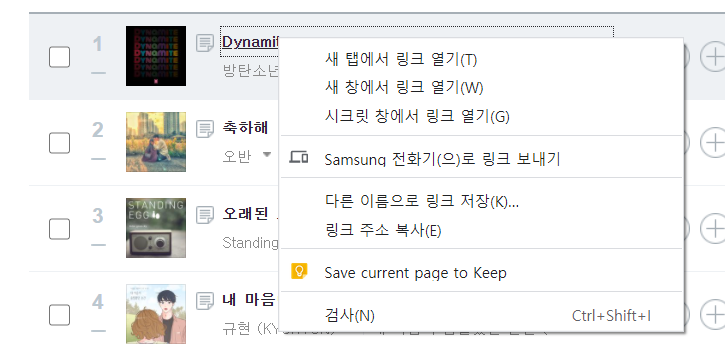

In [1]:
from IPython.display import Image

Image("img/pic1.png")

* *현재 불러온 모듈들과 사진들은 설명을 위한 부분이니 안따라하셔도 됩니다*

여기서 잠깐 우리 코드는 놔두고 지니 웹 사이트를 자세히 들여다봅시다

곡 제목도 있고 앨범 제목도 있고 가수 이름도 있고 다양하네요...<br>
그럼 이런 데이터들은 어디에 있을까?

***

우선 현재 1위 곡인 Dynamite에 커서를 올려둔 뒤에 오른쪽 클릭을 해서<br>
검사 버튼을 눌러봅시다

(위 화면과 동일하게 진행해주세요)

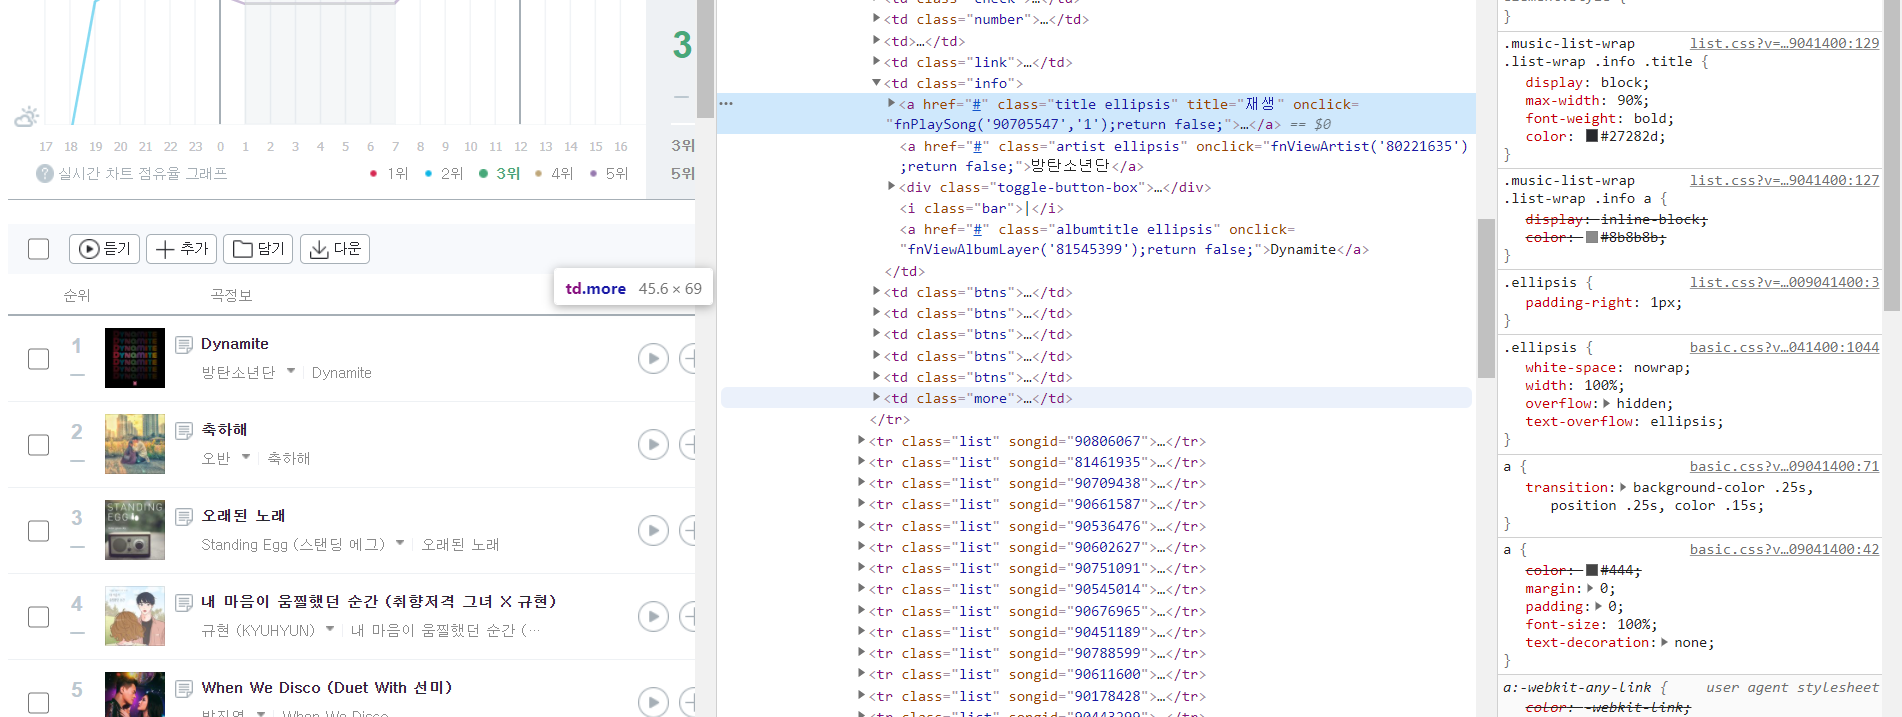

In [4]:
Image("img/pic2.png")

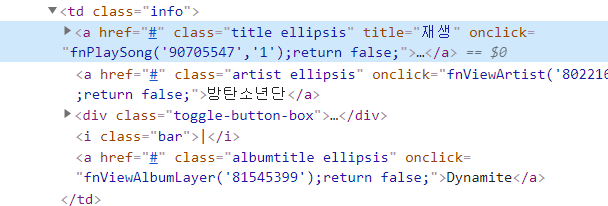

In [5]:
Image("img/pic3.png")

* *현재 불러온 모듈들과 사진들은 설명을 위한 부분이니 안따라하셔도 됩니다*

그러면 다음과 같은 화면에 뜰거에요

우리가 있는 데이터는 어디에 있느냐?<br>
음... 여러가지 태그들로 막 감싸져있긴 한데...<br>

***

요점은 일단 td라는 태그에 클래스 이름이 info라는 틀 안에 데이터가 있네요!<br>
자세히 보신 분이라면 이 틀 안에서

1. a 태그 / 클래스 이름이 title ellipsis : 노래 제목
2. a 태그 / 클래스 이름이 artist ellipsis : 가수 이름
3. a 태그 / 클래스 이름이 albumtitle ellipsis : 앨범 제목

으로 나뉘어진 것을 볼 수 있을 겁니다

***

a 태그까지 깐깐하게 또 나눌 필요는 없고 클래스 이름이 잘 정의되어 있으니<br>
아마 나중에 클래스 이름으로만 분류해도 데이터가 잘 추출될 것 같습니다

In [6]:
n = 1 # 등수
# 현재 4페이지까지 탐색해야 하니까 일단 4번 페이지를 분석해야 한다는 것을 기억

보자... 등수는 1등부터니까 일단 1부터 셀 n을 선언하고...

그 다음에 지니 페이지가 총 4개가 있네요<br>
그렇다면 데이터를 막 뽑아내는 동일한 작업을 4번 해야하니까...어...<br>

반복문을 4번정도 돌려야겠다!<br>
이정도만 기억하고 넘어갑시다

In [ ]:
for j in range(0,4):

    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")

    temp_data = soup.select("td[class=info]")

    for i in temp_data:
        title_data = i.select_one(".title.ellipsis").text.strip()
        artist_data = i.select_one(".artist.ellipsis").text.strip()
        album_data = i.select_one(".albumtitle.ellipsis").text.strip()

        print(n, "등")
        print("제목 : ", title_data)
        print("가수 : ", artist_data)
        print("앨범 : ", album_data)

        n += 1

    next_url = "#body-content > div.page-nav.rank-page-nav > a:nth-child(" + str(j+2) + ")"

    driver.find_element_by_css_selector(next_url).click()

    t.sleep(3)

갑자기 긴 코드가 나와서 놀랬죠? 하핫

우선 반복문 안에 작업들은 세부적으로 나눠서 설명하면 더 헷갈릴 것 같아서<br>
우선 전체 코드를 공개한 다음 진행하도록 하겠습니다

In [ ]:
for j in range(0,4):

    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")

* *현재 코드들은 설명을 위한 부분이니 안따라하셔도 됩니다*

우선 아까 동일한 작업을 4번 반복한다고 했으니<br>
for문을 통해서 4번 반복하겠다고 해줍시다

여기서 중요한 포인트가 2개가 나옵니다

***

첫번째로, 우선 우리가 웹 페이지를 가상으로 생성하고 불러오면<br>
가상 웹 페이지 하나당 html은 당연히 하나로, 1:1구조로 이루어지게 됩니다

당연한 말이지만 동일한 html 코드로 작성하면 동일한 웹 페이지가 나오게 되니까요 (설명을 쫀득하게 못하는 제 자신을 반성합니다)

결론은 이겁니다 우리가 4개의 페이지를 분석하게 된다면<br>
당연히 4개의 웹 페이지는 각각 html이 전부 다른 코드로 이루어져있다는 겁니다

그래서 여러분이 데이터를 추출하고자 하는 페이지마다 새로운 html 코드를 계속 불러오고 저장해야하는 작업이 필수입니다

따라서 for문을 한번 돌 때마다 = 1,2,3,4 페이지를 접속할 때마다<br>
새로운 html 코드를 받아와야 한다는 것을 유의해주세요!

***

두번째는 HTML 코드를 받아오는 방식의 차이입니다

많은 웹 크롤링 초심자분들은 뷰티풀수프와 리퀘스트 패키지를 적절하게 혼합해서<br>
url을 통해 서버에서 바로 HTML 파일을 받아오는 방식부터 배우실 텐데요 (저도 그랬지만)

셀레니움은 그럴 필요가 없죠 왜냐?<br>
지금 우리가 보고있는 가상 웹 페이지에서 바로 HTML을 긁어올 수 있기 때문입니다

...설명이 어렵네요... 나중에 추가 설명을 달도록 하겠습니다<br>
저도 이럴 때마다 공부가 참 많이 필요하다는 것을 느낍니다...반성...

In [ ]:
temp_data = soup.select("td[class=info]")

    for i in temp_data:

* *현재 코드들은 설명을 위한 부분이니 안따라하셔도 됩니다*

자 아까 제가 td라는 태그에 클래스 이름이 info라는 틀 안에 데이터가 있다고 했었으니,<br>
select 함수를 이용해서 우선 큰 틀 자체로 데이터를 받아옵시다

그리고 틀 안에 데이터들이 각각 존재하기 때문에 반복문을 통해서 차근차근 접근하도록 하죠

In [ ]:
        title_data = i.select_one(".title.ellipsis").text.strip()
        artist_data = i.select_one(".artist.ellipsis").text.strip()
        album_data = i.select_one(".albumtitle.ellipsis").text.strip()

* *현재 코드들은 설명을 위한 부분이니 안따라하셔도 됩니다*

오래 전에 작성한 코드라 select를 써도 되는지 모르겠네요<br>
제 생각에는 굳이 select_one을 쓸 필요가 없을 것 같긴한데...

자 아까 제가 설명한 대로, 태그 이름은 어차피 동일하니까 클래스 이름을 토대로 데이터를 추출해봅시다<br>
각각 노래 제목 / 가수 이름 / 앨범 제목순으로 데이터를 추출하겠습니다

***

여기서 주의하셔야 하는 것이, 아까 우리가 HTML 코드 상에서 봤던 건 title ellipsis라고 공백이 포함되어 있는 형태였지만,
select 함수 내에 클래스 이름을 넣을 때는 반드시 공백을 .으로 대체해서 넣어야 합니다

따라서 title ellipsis 라는 이름은 .title.ellipsis라고 넣어야 올바르게 클래스 이름을 찾아가게 됩니다

가만 여기서 제일 앞에는 왜 붙였더라...?

***

각각 데이터들을 잘 접근하고 받아왔다면, 관련 태그 정보나 다른 것들은 일절 필요없으니 text만 뽑아서 내줍시다<br>
그리고 텍스트들이 불필요하게 공백이 많이 포함되어 있는 것을 방지하기 위해
문자열 관련 함수인 strip()을 이용해서 공백을 삭제해줍시다<br>

In [ ]:
        print(n, "등")
        print("제목 : ", title_data)
        print("가수 : ", artist_data)
        print("앨범 : ", album_data)
        
        n += 1

* *현재 코드들은 설명을 위한 부분이니 안따라하셔도 됩니다*

이제 데이터들을 잘 받아오고 정리했으니 남은건 출력이죠!

뭐 각자 입맛에 맞게 정리하면 되겠지만, 저는 일단 이런식으로 1등 / 제목 / 가수 / 앨범순으로 출력하게 했습니다<br>
지금보니 너무 불필요하게 print문이 4번이나 쓸 필요는 없이<br>
한번에 정리하는 방식이 더 좋을 것 같다는 생각이 드네요

이제 다음 2등을 출력하기 위해서 n에다가 1을 더해주는 작업도 간간히 해줍시다

In [ ]:
    next_url = "#body-content > div.page-nav.rank-page-nav > a:nth-child(" + str(j+2) + ")"

    driver.find_element_by_css_selector(next_url).click()

* *현재 코드들은 설명을 위한 부분이니 안따라하셔도 됩니다*

두번째 for문 (for i in temp_data: 부분)이 끝나게 되면<br>
우선 이 페이지에서는 작업할 내용이 전부 끝났다는 내용이 됩니다

그렇다면 우리가 현재 있는 페이지가 1페이지라고 가정한다면
가상 웹 페이지 내에서 어떻게 2페이지로 이동할까요?

***

미리 답을 알려주자면 2페이지의 링크를 알아서 찾은 다음에 클릭하게 하는 것입니다<br>
그러면 알아서 2페이지로 넘어가게 되겠죠

여기서는 두 가지 의문점이 발생합니다
- 어떻게 링크를 알아서 찾게 할 것인가?
- 어떻게 그 링크를 클릭하게 할 것인가?

* *현재 코드들은 설명을 위한 부분이니 안따라하셔도 됩니다*

우선 링크부터 해결해보죠

HTML에서 각 객체들은 고유한 ID값들을 가지게 됩니다<br>
당연한 말이지만 구별하기 위해서죠

ID값은 CSS와 XPath, 두 가지로 찾아내는 방법이 있습니다

뭐 어떤 방법을 사용하던 상관은 없지만 간혹 CSS만 / Xpath만 사용해야 하는 경우가 있다는 것만 기억하시면 될 것 같습니다
여기서는 우선 CSS로 찾아보겠습니다

***

